# DATA WRANGLING

# Amazon reviews and ratings - Amazon Appliances

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")

In [2]:
review_df = pd.read_json('../data/Appliances_5.json', lines=True)

In [3]:
review_df.head(3)

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
0,5,True,"08 22, 2013",A34A1UP40713F8,B00009W3I4,{'Style:': ' Dryer Vent'},James. Backus,I like this as a vent as well as something tha...,Great product,1377129600,NaN,NaN
1,5,True,"02 8, 2016",A1AHW6I678O6F2,B00009W3PA,{'Size:': ' 6-Foot'},kevin.,good item,Five Stars,1454889600,NaN,NaN
2,5,True,"08 5, 2015",A8R48NKTGCJDQ,B00009W3PA,{'Size:': ' 6-Foot'},CDBrannom,Fit my new LG dryer perfectly.,Five Stars,1438732800,NaN,NaN


In [4]:
review_df.shape

(2277, 12)

In [5]:
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2277 entries, 0 to 2276
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   overall         2277 non-null   int64 
 1   verified        2277 non-null   bool  
 2   reviewTime      2277 non-null   object
 3   reviewerID      2277 non-null   object
 4   asin            2277 non-null   object
 5   style           38 non-null     object
 6   reviewerName    2277 non-null   object
 7   reviewText      2277 non-null   object
 8   summary         2277 non-null   object
 9   unixReviewTime  2277 non-null   int64 
 10  vote            2074 non-null   object
 11  image           828 non-null    object
dtypes: bool(1), int64(2), object(9)
memory usage: 198.0+ KB


<b> The features which have non-null values include:
    
    * overall : rating of the product
    * verified 
    * reviewTime : time of the review (raw)
    * reviewerID : ID of the reviewer
    * asin : ID of the product
    * unixReviewTime : time of the review (unix time)
    * reviewerName : name of the reviewer
    * summary : summary of the review
    * reviewerText : text of the review
    
   The features that have less than 100 null values include:
    
    * vote : helpful votes of the review
    * image : images that users post after they have received the product
    
   The features which have considerable amount of null values include:
    
    * style : a dictionary of the product metadata
     
    
   We will need overall, reviewerID, asin, reviewerText further to work on our model. We can select other features like reviewerName, but we already have reviewerID, so this feature is not necessary.

In [6]:
# Renaming column names : asin to productID and overall to rating.
review_df.rename(columns={"asin":"productID","overall":"rating"},inplace=True)
review_df.head()

,rating,verified,reviewTime,reviewerID,productID,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
0,5,True,"08 22, 2013",A34A1UP40713F8,B00009W3I4,{'Style:': ' Dryer Vent'},James. Backus,I like this as a vent as well as something tha...,Great product,1377129600,NaN,NaN
1,5,True,"02 8, 2016",A1AHW6I678O6F2,B00009W3PA,{'Size:': ' 6-Foot'},kevin.,good item,Five Stars,1454889600,NaN,NaN
2,5,True,"08 5, 2015",A8R48NKTGCJDQ,B00009W3PA,{'Size:': ' 6-Foot'},CDBrannom,Fit my new LG dryer perfectly.,Five Stars,1438732800,NaN,NaN
3,5,True,"04 24, 2015",AR3OHHHW01A8E,B00009W3PA,{'Size:': ' 6-Foot'},Calvin E Reames,Good value for electric dryers,Perfect size,1429833600,NaN,NaN
4,5,True,"03 21, 2015",A2CIEGHZ7L1WWR,B00009W3PA,{'Size:': ' 6-Foot'},albert j. kong,Price and delivery was excellent.,Five Stars,1426896000,NaN,NaN


In [7]:
# Dropping columns not required
review_df.drop(columns=['verified','reviewTime','unixReviewTime','vote','image'], inplace=True)

In [8]:
review_df = review_df[["productID","style","reviewerID","reviewerName","reviewText","summary","rating"]]
review_df.head(3)

,productID,style,reviewerID,reviewerName,reviewText,summary,rating
0,B00009W3I4,{'Style:': ' Dryer Vent'},A34A1UP40713F8,James. Backus,I like this as a vent as well as something tha...,Great product,5
1,B00009W3PA,{'Size:': ' 6-Foot'},A1AHW6I678O6F2,kevin.,good item,Five Stars,5
2,B00009W3PA,{'Size:': ' 6-Foot'},A8R48NKTGCJDQ,CDBrannom,Fit my new LG dryer perfectly.,Five Stars,5


# Amazon Appliances meta data

In [10]:
meta_df = pd.read_json('../data/meta_Appliances.json', lines=True)

In [11]:
meta_df.head(3)

,category,tech1,description,fit,title,also_buy,tech2,brand,feature,rank,also_view,details,main_cat,similar_item,date,price,asin,imageURL,imageURLHighRes
0,"[Appliances, Refrigerators, Freezers & Ice Mak...","class=""a-keyvalue prodDetTable"" role=""present...",[],,Tupperware Freezer Square Round Container Set ...,[],,Tupperware,[Each 3-pc. set includes two 7/8-cup/200 mL an...,"[>#39,745 in Appliances (See top 100)]",[],{},Appliances,,"November 19, 2008",,7301113188,[],[]
1,"[Appliances, Refrigerators, Freezers & Ice Mak...","class=""a-keyvalue prodDetTable"" role=""present...",[2 X Tupperware Pure & Fresh Unique Covered Co...,,2 X Tupperware Pure &amp; Fresh Unique Covered...,[],,Tupperware,[2 X Tupperware Pure & Fresh Unique Covered Co...,"[>#6,118 in Appliances (See top 100)]",[B004RUGHJW],{},Appliances,,"June 5, 2016",$3.62,7861850250,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...
2,"[Appliances, Parts &amp; Accessories]",,[],,The Cigar - Moments of Pleasure,[],,The Cigar Book,[],"[>#1,861,816 in Home &amp; Kitchen (See Top 10...","[B01HCAVSLK, 1632206579]",{},Amazon Home,,,$150.26,8792559360,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...


In [12]:
meta_df.shape

(30445, 19)

In [13]:
meta_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30445 entries, 0 to 30444
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   category         30445 non-null  object
 1   tech1            30445 non-null  object
 2   description      30445 non-null  object
 3   fit              30445 non-null  object
 4   title            30445 non-null  object
 5   also_buy         30445 non-null  object
 6   tech2            30445 non-null  object
 7   brand            30445 non-null  object
 8   feature          30445 non-null  object
 9   rank             30445 non-null  object
 10  also_view        30445 non-null  object
 11  details          30445 non-null  object
 12  main_cat         30445 non-null  object
 13  similar_item     30445 non-null  object
 14  date             30445 non-null  object
 15  price            30445 non-null  object
 16  asin             30445 non-null  object
 17  imageURL         30445 non-null

<b>There are no null values in any columns, in the meta data.</b>

In [14]:
# Dropping columns not required
meta_df.drop(columns=['feature','rank','date','description','price','also_view','also_buy','fit','details','similar_item','tech1'], inplace=True)

In [15]:
meta_df = meta_df[["asin","title","brand","imageURL","imageURLHighRes"]]

In [16]:
# Renaming column names : asin to productID.
meta_df.rename(columns={"asin":"productID"},inplace=True)

In [17]:
meta_df.tail()

,productID,title,brand,imageURL,imageURLHighRes
30440,B01HJH92JQ,Bosch 00175338 Switch,Bosch,[],[]
30441,B01HJH2I5G,Bosch 00478807 Panel-Facia,Bosch,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...
30442,B01HJH0J1G,Bosch 00649288 Ice Maker,Bosch,[],[]
30443,B01HJHHEA0,Frigidaire 316543810 Knob,Frigidaire,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...
30444,B01HJH397M,Bosch 00674704 Pump-Drain,Bosch,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...


In [18]:
meta_df.productID.nunique()

30239

In [19]:
duplicate_meta = meta_df[meta_df.duplicated(subset="productID" ,keep='first')]
duplicate_meta

,productID,title,brand,imageURL,imageURLHighRes
210,B00002N5EL,EATON Wiring 39CH-SP-L Arrow Hart 1-Gang Chrom...,EATON Wiring,[],[]
211,B00002N7HY,"Leviton 5050 B01-0-000 Electrical Receptacle, ...",Leviton,[],[]
212,B00002N7IL,"Leviton 5206 50 Amp, 125/250 Volt, NEMA 10-50R...",Leviton,[],[]
213,B00002N9OE,Amerock BP5322-BJ 1-1/2-Inch Diameter Ceramic ...,Amerock,[],[]
214,B00002NARC,Leviton 5207 125/250V Flush Mount Receptacle,Leviton,[],[]
...,...,...,...,...,...
411,B0002Z1FJ8,Electric Oven Knob Kit by Ez-Flo International...,GE,[],[]
412,B0002Z1GR4,Range Hood Motor Blade,Universal Metals Industries,[],[]
413,B0002Z1GJ2,Whirlpool 326795 Range Broil Element Genuine O...,Whirlpool,[],[]
414,B00032ATU6,GE 51147 Wireless Remote Transmitter,GE,[],[]


In [20]:
meta_df[meta_df['productID']=='B00002N5EL']

,productID,title,brand,imageURL,imageURLHighRes
4,B00002N5EL,EATON Wiring 39CH-SP-L Arrow Hart 1-Gang Chrom...,EATON Wiring,[],[]
210,B00002N5EL,EATON Wiring 39CH-SP-L Arrow Hart 1-Gang Chrom...,EATON Wiring,[],[]


<b>There are 206 duplicated values of product ID and there are stacked from index 210 to 415. We can remove these duplicates.</b>

In [21]:
meta_df.drop(duplicate_meta.index, inplace=True)

In [22]:
meta_df[meta_df.duplicated(subset="productID" ,keep='first')]

,productID,title,brand,imageURL,imageURLHighRes


# EDA

In [23]:
review_df['rating'].describe()

count    2277.000000
mean        4.499780
std         0.837723
min         1.000000
25%         4.000000
50%         5.000000
75%         5.000000
max         5.000000
Name: rating, dtype: float64

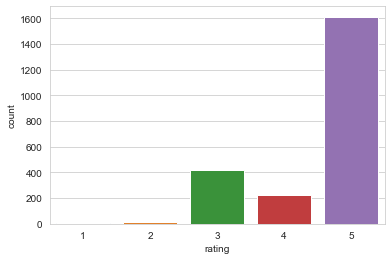

In [24]:
sns.countplot(x='rating', data= review_df)
plt.show()

There are hardly 1 and 2 star ratings and 5 start rating makes more than half the amount of ratings given by the customer for amazon appliances.

In [25]:
review_df.shape

(2277, 7)

In [26]:
# Considering products with atleat 3 ratings/reviews
appl_count = review_df.groupby(by="productID")["rating"].count().reset_index()
appl_count = appl_count.query('rating >= 3').reset_index(drop=True)

appl_count.head()

,productID,rating
0,B00009W3PA,5
1,B0006GVNOA,2040
2,B000N6302Q,7
3,B000NCTOUM,7
4,B000VL060M,4


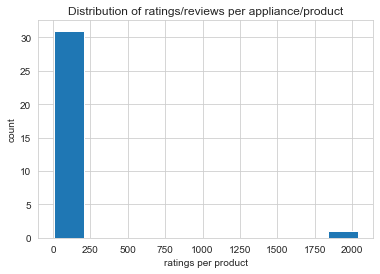

In [27]:
appl_count.hist(column = 'rating')
plt.xlabel('ratings per product')
plt.ylabel('count')
plt.title('Distribution of ratings/reviews per appliance/product')
plt.show()

<b> Looks like only one product has got more than 1750 number of ratings and other products have got between 0-250 number of ratings.</b>

In [28]:
# Let us see the first 10 reviwed/rated products.
appl_count1 = appl_count.sort_values(by='rating', ascending  = False).reset_index(drop=True)
appl_count1 = pd.merge(appl_count1, meta_df, left_on='productID', right_on='productID', how='inner')
appl_count1 = appl_count1[['productID','title','brand','rating']]
appl_count1.head(10)

,productID,title,brand,rating
0,B0006GVNOA,Gardus RLE202 LintEater Rotary Dryer Vent Clea...,LintEater,2040
1,B0014CN8Y8,Gardus RLE202 LintEater Rotary Dryer Vent Cle...,LintEater,24
2,B00JGTUQJ6,Tier1 Replacement for Samsung DA29-00003G Aqua...,Tier1,13
3,B0015UGPWQ,"Dundas Jafine BTD48TC Vents, 4-Inch",Dundas Jafine,12
4,B004XLDE5A,Whirlpool 279816 Thermostat Kit for Dryer,Whirlpool,8
5,B00CW0O1EW,(10 Pack) Whirlpool Kenmore Maytag Roper Admir...,Femitu,8
6,B0056I99WG,279838 Napco replacement Dryer Heating Element...,Napc,8
7,B000XXWOGW,"Supco ES671 Washer Lid Switch, Replaces Whirlp...",Supco,8
8,B001DPFP88,AE-Select 285785 Washer Clutch Kit for Whirlpool,Whirlpool,7
9,B00P9C66PM,285785 Washer Clutch Kit For Whirlpool Kenmore...,Whirlpool,7


In [29]:
# User rating for the product with product rating count more than 3
user_rating = pd.merge(appl_count, review_df, left_on='productID', right_on='productID', how='left')
user_rating.head()

,productID,rating_x,style,reviewerID,reviewerName,reviewText,summary,rating_y
0,B00009W3PA,5,{'Size:': ' 6-Foot'},A1AHW6I678O6F2,kevin.,good item,Five Stars,5
1,B00009W3PA,5,{'Size:': ' 6-Foot'},A8R48NKTGCJDQ,CDBrannom,Fit my new LG dryer perfectly.,Five Stars,5
2,B00009W3PA,5,{'Size:': ' 6-Foot'},AR3OHHHW01A8E,Calvin E Reames,Good value for electric dryers,Perfect size,5
3,B00009W3PA,5,{'Size:': ' 6-Foot'},A2CIEGHZ7L1WWR,albert j. kong,Price and delivery was excellent.,Five Stars,5
4,B00009W3PA,5,{'Size:': ' 6-Foot'},A1RQQV9HYHDHDN,Adam Baer,I purchasaed a new dryer and did not want to r...,Easy install,5


In [30]:
# considering users who atleast gave 3 reviews/ ratings
user_count = review_df.groupby(by=['reviewerID','reviewerName'])['rating'].count().reset_index()
user_count = user_count.query('rating >= 5').reset_index(drop=True)

user_count.head()

,reviewerID,reviewerName,rating
0,A11SCLK8GDDN3C,mrclobhead,6
1,A13391AZAFJ67K,Fred A,9
2,A1AHW6I678O6F2,kevin.,5
3,A1AJW9DILZFTQI,Riteway Appliance,5
4,A1EUO0BU72JR7T,Bilbo,7


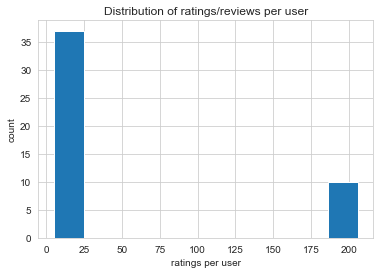

In [31]:
user_count.hist(column = 'rating')
plt.xlabel('ratings per user')
plt.ylabel('count')
plt.title('Distribution of ratings/reviews per user')
plt.show()

<b> Around 10 users have given more than 185 number of ratings. The rest of the users have given ratings between 0-25. </b>

In [32]:
# Let us see who are those 10 users who have reviewed/ rated products the most.
user_count1 = user_count.sort_values(by='rating', ascending  = False).reset_index(drop=True)
user_count1.head(10)

,reviewerID,reviewerName,rating
0,A25C30G90PKSQA,CP,206
1,A1IT56MV1C09VS,Looneypenguin,206
2,A2B2JVUX5YN8RU,Caleb,206
3,A21TPY9BVC9IKZ,Ann,206
4,A1WD61B0C3KQZB,Jason W.,206
5,A3VYM3NY7W4MX4,MarkS,206
6,A3TMNU7VNK5JJE,Lisa Rodeheaver,206
7,A8WEXFRWX1ZHH,Goldengate,206
8,AMY6O4Z9HINO0,J. Foust,206
9,A2LDP3A4IE9T6T,mike27971,206


In [33]:
# combine both user and product data with 3 or more ratings
combine_df = user_rating.merge(user_count, left_on = 'reviewerID', right_on = 'reviewerID', how = 'inner')

combine_df.head()

,productID,rating_x,style,reviewerID,reviewerName_x,reviewText,summary,rating_y,reviewerName_y,rating
0,B00009W3PA,5,{'Size:': ' 6-Foot'},A1AHW6I678O6F2,kevin.,good item,Five Stars,5,kevin.,5
1,B0015UGPWQ,12,{'Size Name:': ' 4 Inch'},A1AHW6I678O6F2,kevin.,very nice product,Five Stars,5,kevin.,5
2,B0015UGPWQ,12,{'Size Name:': ' 4 Inch'},A1AHW6I678O6F2,kevin.,very nice product,Five Stars,5,kevin.,5
3,B001769IVI,6,NaN,A1AHW6I678O6F2,kevin.,a must for washers,Five Stars,5,kevin.,5
4,B001769IVI,6,NaN,A1AHW6I678O6F2,kevin.,a must for washers,Five Stars,5,kevin.,5


In [34]:
combine_df.shape

(2252, 10)

In [35]:
duplicate = combine_df[combine_df.duplicated(subset= ["productID",'reviewerID'] ,keep='first')]
duplicate.shape

(2086, 10)

In [36]:
combine_df = combine_df.drop(columns = ['rating_x','rating','reviewerName_x'])

In [37]:
print('Number of products: ', combine_df['productID'].nunique())

Number of products:  32


In [38]:
print('Number of users: ', combine_df['reviewerID'].nunique())

Number of users:  46


In [39]:
print('ratings unique: ', combine_df['rating_y'].nunique())

ratings unique:  5


In [40]:
combine_df = combine_df.drop_duplicates(['reviewerID', 'productID'])
combine_df.rename(columns = {'rating_y': 'rating', 'reviewerName_y':'reviewerName'}, inplace=True)

user_prod_matrix = combine_df.pivot(index='reviewerID', columns='productID', values='rating')
user_prod_matrix.fillna(0, inplace=True)
users = user_prod_matrix.index.tolist()
books = user_prod_matrix.columns.tolist()
user_prod_matrix

productID,B00009W3PA,B0006GVNOA,B000N6302Q,B000NCTOUM,B000VL060M,B000XXWOGW,B000XXYUSM,B00126NABC,B0014CN8Y8,B0015UGPWQ,...,B008YDSH6E,B00AHR3IG4,B00CW0O1EW,B00DM8J11Q,B00DM8JA7Q,B00DM8KQ2Y,B00JGTUQJ6,B00MGMWTQS,B00P9C66PM,B00W4YKCGC
reviewerID,,,,,,,,,,,,,,,,,,,,,
A11SCLK8GDDN3C,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,5.0,0.0,5.0,0.0,0.0,5.0,0.0,0.0
A13391AZAFJ67K,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0
A1AHW6I678O6F2,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A1AJW9DILZFTQI,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A1EUO0BU72JR7T,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,0.0,0.0,0.0,5.0,0.0,0.0
A1H2V1GNEY4LZ0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
A1HWFUO5PKB2RW,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A1IT56MV1C09VS,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A1LN48DHHCKLR3,0.0,0.0,0.0,5.0,0.0,0.0,5.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
combine_df['rating'].value_counts()

5    139
3      8
2      8
4      7
1      4
Name: rating, dtype: int64

In [42]:
combine_df.shape

(166, 7)

In [43]:
combine_df.columns

Index(['productID', 'style', 'reviewerID', 'reviewText', 'summary', 'rating',
       'reviewerName'],
      dtype='object')

In [44]:
combine_df.head()

,productID,style,reviewerID,reviewText,summary,rating,reviewerName
0,B00009W3PA,{'Size:': ' 6-Foot'},A1AHW6I678O6F2,good item,Five Stars,5,kevin.
1,B0015UGPWQ,{'Size Name:': ' 4 Inch'},A1AHW6I678O6F2,very nice product,Five Stars,5,kevin.
3,B001769IVI,NaN,A1AHW6I678O6F2,a must for washers,Five Stars,5,kevin.
5,B00009W3PA,{'Size:': ' 6-Foot'},A8R48NKTGCJDQ,Fit my new LG dryer perfectly.,Five Stars,5,CDBrannom
6,B0015UGPWQ,{'Size Name:': ' 4 Inch'},A8R48NKTGCJDQ,Fits perfectly,Five Stars,5,CDBrannom


In [45]:
combine_df = combine_df[['productID','style','reviewerID','reviewerName','reviewText','summary','rating']]
combine_df.head(1)

,productID,style,reviewerID,reviewerName,reviewText,summary,rating
0,B00009W3PA,{'Size:': ' 6-Foot'},A1AHW6I678O6F2,kevin.,good item,Five Stars,5


In [46]:
combine_df.to_csv("../data/processed data/review_data.csv", index = False)
user_prod_matrix.to_csv("../data/processed data/rating_matrix.csv", index = False)

In [47]:
meta_df.to_csv("../data/processed data/meta_final.csv", index = False)